# Autoencoder

### 특징 벡터 x를 입력 받아 동일한 또는 유사한 벡터 x'를 출력하는 신경망.

### 가상의 이미지를 생성하는 것으로는 GAN 과 유사하나, GAN과 달리 입력된 데이터를 이용하여 특징을 담아내어 가상의 이미지를 만들어 낸다.

### 오토 인코더는 인코더와 디코더 두 부분으로 구성되어 있다.

- 인코더 : 인지 네트워크(recognition network)라고도 하며, 입력을 내부 표현으로 변환한다.

- 디코더 : 생성 네트워크(generative nework)라고도 하며, 내부 표현을 출력으로 변환한다.

![오토인코더](https://ifh.cc/g/5pk4zr.jpg)


In [1]:
#라이브러리 설정하기
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Reshape

SEED=2020
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

2022-12-11 11:54:36.512613: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 11:54:37.774950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-11 11:54:37.775068: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-11 11:54:37.775079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like t

In [2]:
from tensorflow.keras import datasets
fashion_mnist = datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 피처 스케일링
X_train = X_train / 255.
X_test = X_test /255.

# 차원 추가
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [3]:
#오토인코더 정의
def Autoencoder():
    model = Sequential()
    
    # Encoder 
    model.add(Conv2D(filters=16, kernel_size=(3,3), 
                    activation='relu', input_shape=[28,28,1]))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    
    # Decoder
    model.add(Dense(units=28*28, activation='sigmoid'))
    model.add(Reshape((28,28)))
    
    # Compile
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    return model

ae_model = Autoencoder()
ae_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 64)                173120    
                                                                 
 dense_1 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                        

In [4]:
history = ae_model.fit(X_train, X_train, batch_size=64, epochs=20, 
                       validation_data=(X_test, X_test), verbose=0)

ae_images = ae_model.predict(X_test)
ae_images.shape

313/313 [==============================] - 1s 2ms/step


(10000, 28, 28)

## 주요 특징을 추출 및 학습후, 복원하여 나타낸다.

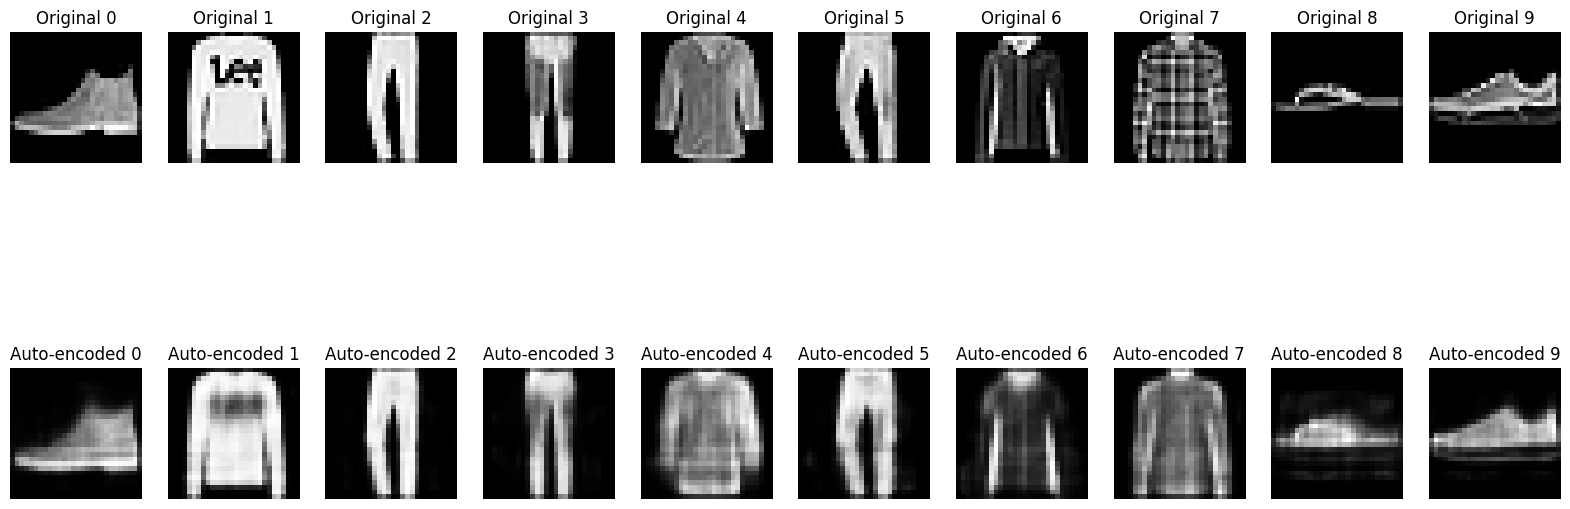

In [5]:
num = 10
plt.figure(figsize=(20,8))

for i in range(num):
    # 원본 이미지
    ax = plt.subplot(2, num, i+1)
    plt.imshow(X_test[i].reshape((28,28)), cmap='gray')
    plt.title("Original %s" % str(i))
    plt.axis('off')
    
    # 복원 이미지
    ax = plt.subplot(2, num, i+num+1)
    plt.imshow(ae_images[i], cmap='gray')
    plt.title("Auto-encoded %s" % str(i))
    plt.axis('off')
    
plt.show()

#학습을 진행하는데 시간이 매우 적게 걸린다.

## 결론

#### 위 사진과 같이, 물체의 특징을 유추할 수 있는 것들을 모아서 이미지를 만들어 낸다.
#### 이는 새로운 이미지를 창조하는 모델인 GAN과는 여러 방면에서 차이점을 보인다.
#### 이중 가장 큰 차이점으로는 GAN은 입력된 데이터없이 새로 생성된 이미지를 판별하는 과정을 수행하지만, 오토인코더는 데이터가 주어지고, 이 데이터의 특징을 이용하여 새로운 이미지를 생성하는 것이 있다.
